# Plot drone

## Loading modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Functions

In [2]:
def time_plot(variables, sim_out, title:str=None, filename:str=None):
    fig, axes = plt.subplots(len(variables),1,figsize=(19.20,10.80))
    for i, zipped in enumerate(zip(axes, variables)):
        ax, var = zipped
        ax.grid()
        ax.plot(sim_out['t'], sim_out[var])
        if i < len(variables)-1:
            ax.set(xticklabels=[], ylabel=var)
        else:
            ax.set(ylabel=var, xlabel='Time')
    
    if title is not None:
        fig.suptitle(title, fontsize='large')
    fig.tight_layout()

    if filename is not None:
        fig.savefig(filename, dpi=72, transparent=False, facecolor='white')
    
    return fig, axes

def state_space_plot(x, y, sim_out, title:str=None, filename:str=None):
    fig, ax = plt.subplots(1,1,figsize=(19.20,10.80))
    ax.grid()
    ax.plot(sim_out[x], sim_out[y])
    ax.set(xlabel=x, ylabel=y)

    if title is not None:
        fig.suptitle(title, fontsize='large')
    fig.tight_layout()

    if filename is not None:
        fig.savefig(filename, dpi=72, transparent=False, facecolor='white')
    return fig, ax

## Loading data

In [3]:
filename = '../drone_sim_out.csv'
sim_out = pd.read_csv(filename, index_col=0, dtype=float)
sim_out

,t,phi,dphi,theta,dtheta,psi,dpsi,x,dx,y,dy,z,dz
0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
1.0,0.000100,5.000000e-09,0.000100,5.000000e-09,0.000100,5.000000e-09,0.000100,4.583308e-17,1.833321e-12,-4.583308e-17,-1.833321e-12,4.999833e-09,0.000100
2.0,0.001100,6.050000e-07,0.001100,6.050000e-07,0.001100,6.050000e-07,0.001100,6.710057e-13,2.439985e-09,-6.710054e-13,-2.439983e-09,6.047782e-07,0.001099
3.0,0.011100,6.160500e-05,0.011100,6.160500e-05,0.011100,6.160500e-05,0.011100,6.953782e-09,2.505519e-06,-6.953438e-09,-2.505333e-06,6.137706e-05,0.011038
4.0,0.021100,2.226050e-04,0.021100,2.226050e-04,0.021100,2.226050e-04,0.021100,9.075067e-08,1.719973e-05,-9.073451e-08,-1.719514e-05,2.210394e-04,0.020877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084.0,9.965261,4.965322e+01,9.965261,4.965322e+01,9.965261,4.965322e+01,9.965262,3.150546e+10,7.390640e+09,5.992113e+02,1.242967e+02,1.001978e+00,0.005649
1085.0,9.975261,4.975292e+01,9.975261,4.975292e+01,9.975261,4.975292e+01,9.975262,3.157936e+10,7.390640e+09,6.004548e+02,1.243935e+02,1.002035e+00,0.005573
1086.0,9.985261,4.985272e+01,9.985261,4.985272e+01,9.985261,4.985272e+01,9.985262,3.165327e+10,7.390640e+09,6.016991e+02,1.244658e+02,1.002090e+00,0.005497
1087.0,9.995261,4.995263e+01,9.995261,4.995263e+01,9.995261,4.995263e+01,9.995262,3.172718e+10,7.390640e+09,6.029440e+02,1.245173e+02,1.002145e+00,0.005421


## Drone positions over time

(<Figure size 1920x1080 with 3 Axes>,
 array([<AxesSubplot:ylabel='x'>, <AxesSubplot:ylabel='y'>,
        <AxesSubplot:xlabel='Time', ylabel='z'>], dtype=object))

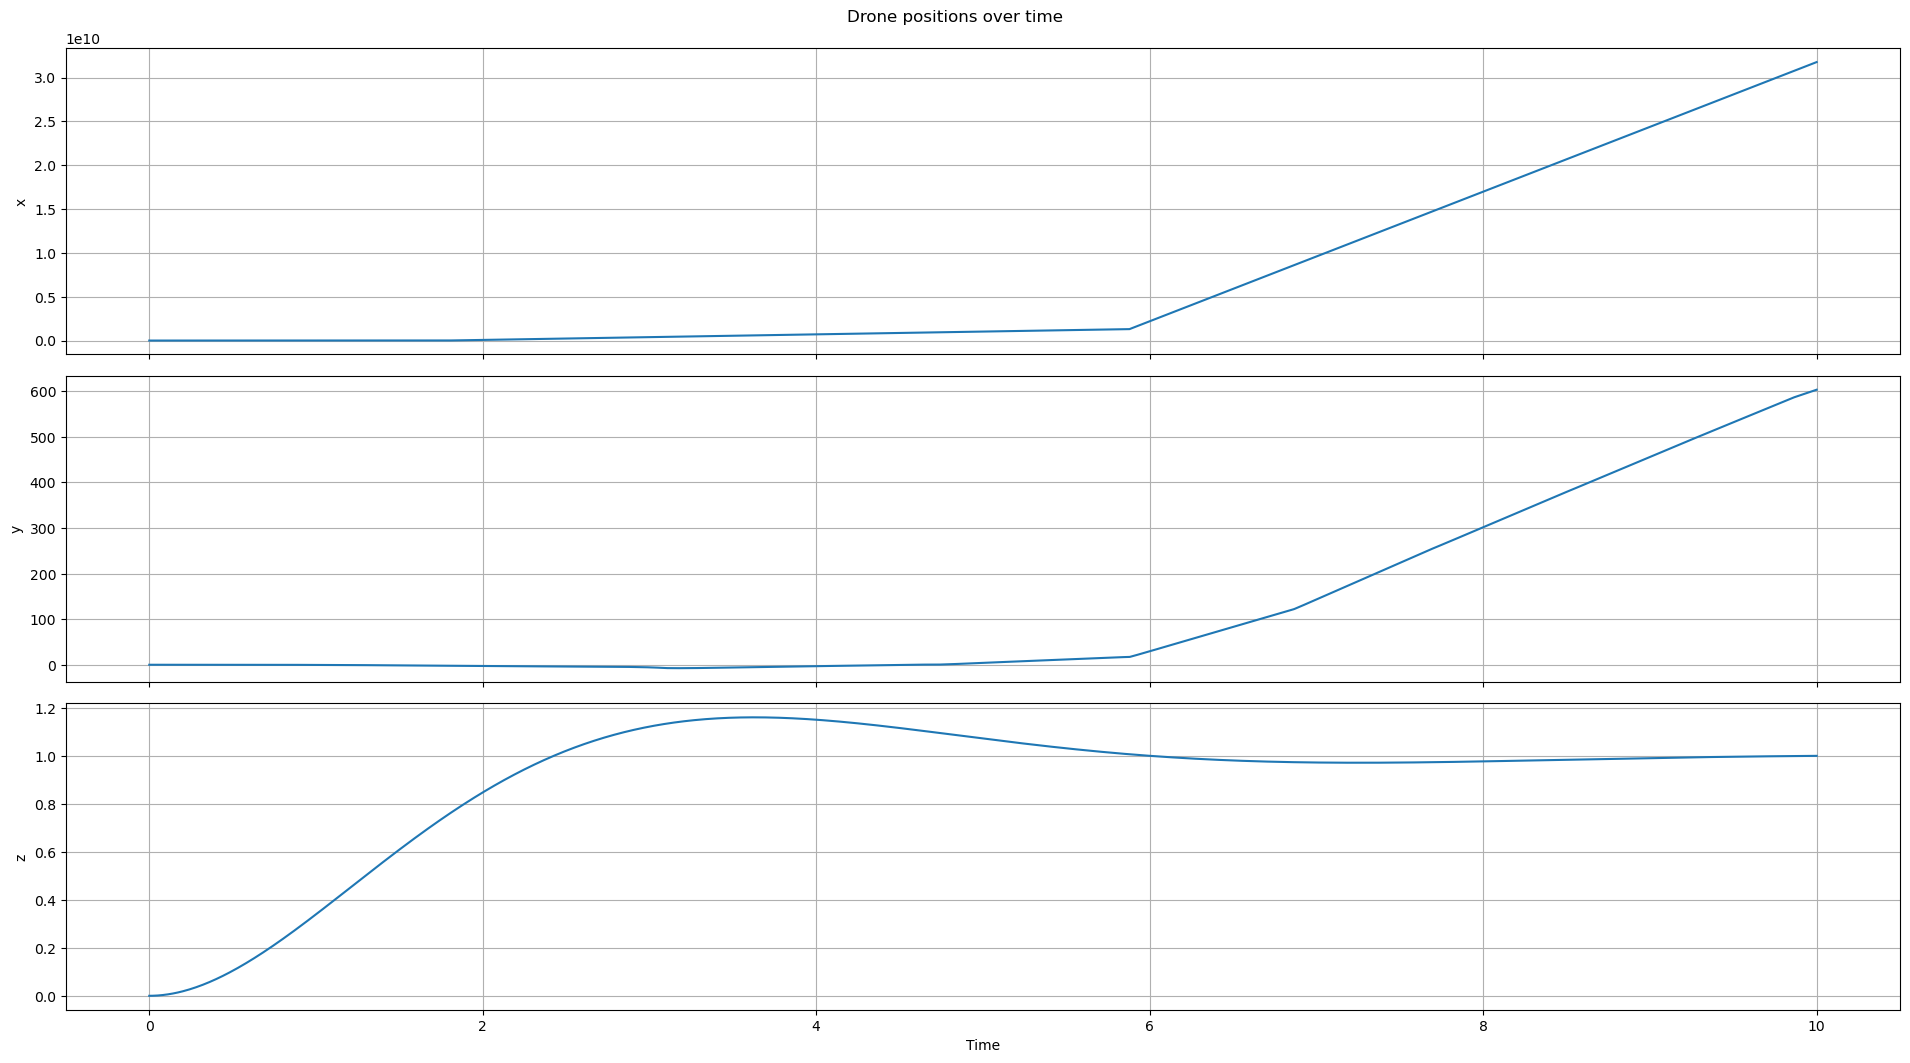

In [4]:
time_plot(['x', 'y', 'z'], sim_out, title='Drone positions over time')

## Drone diff positions over time

(<Figure size 1920x1080 with 3 Axes>,
 array([<AxesSubplot:ylabel='dx'>, <AxesSubplot:ylabel='dy'>,
        <AxesSubplot:xlabel='Time', ylabel='dz'>], dtype=object))

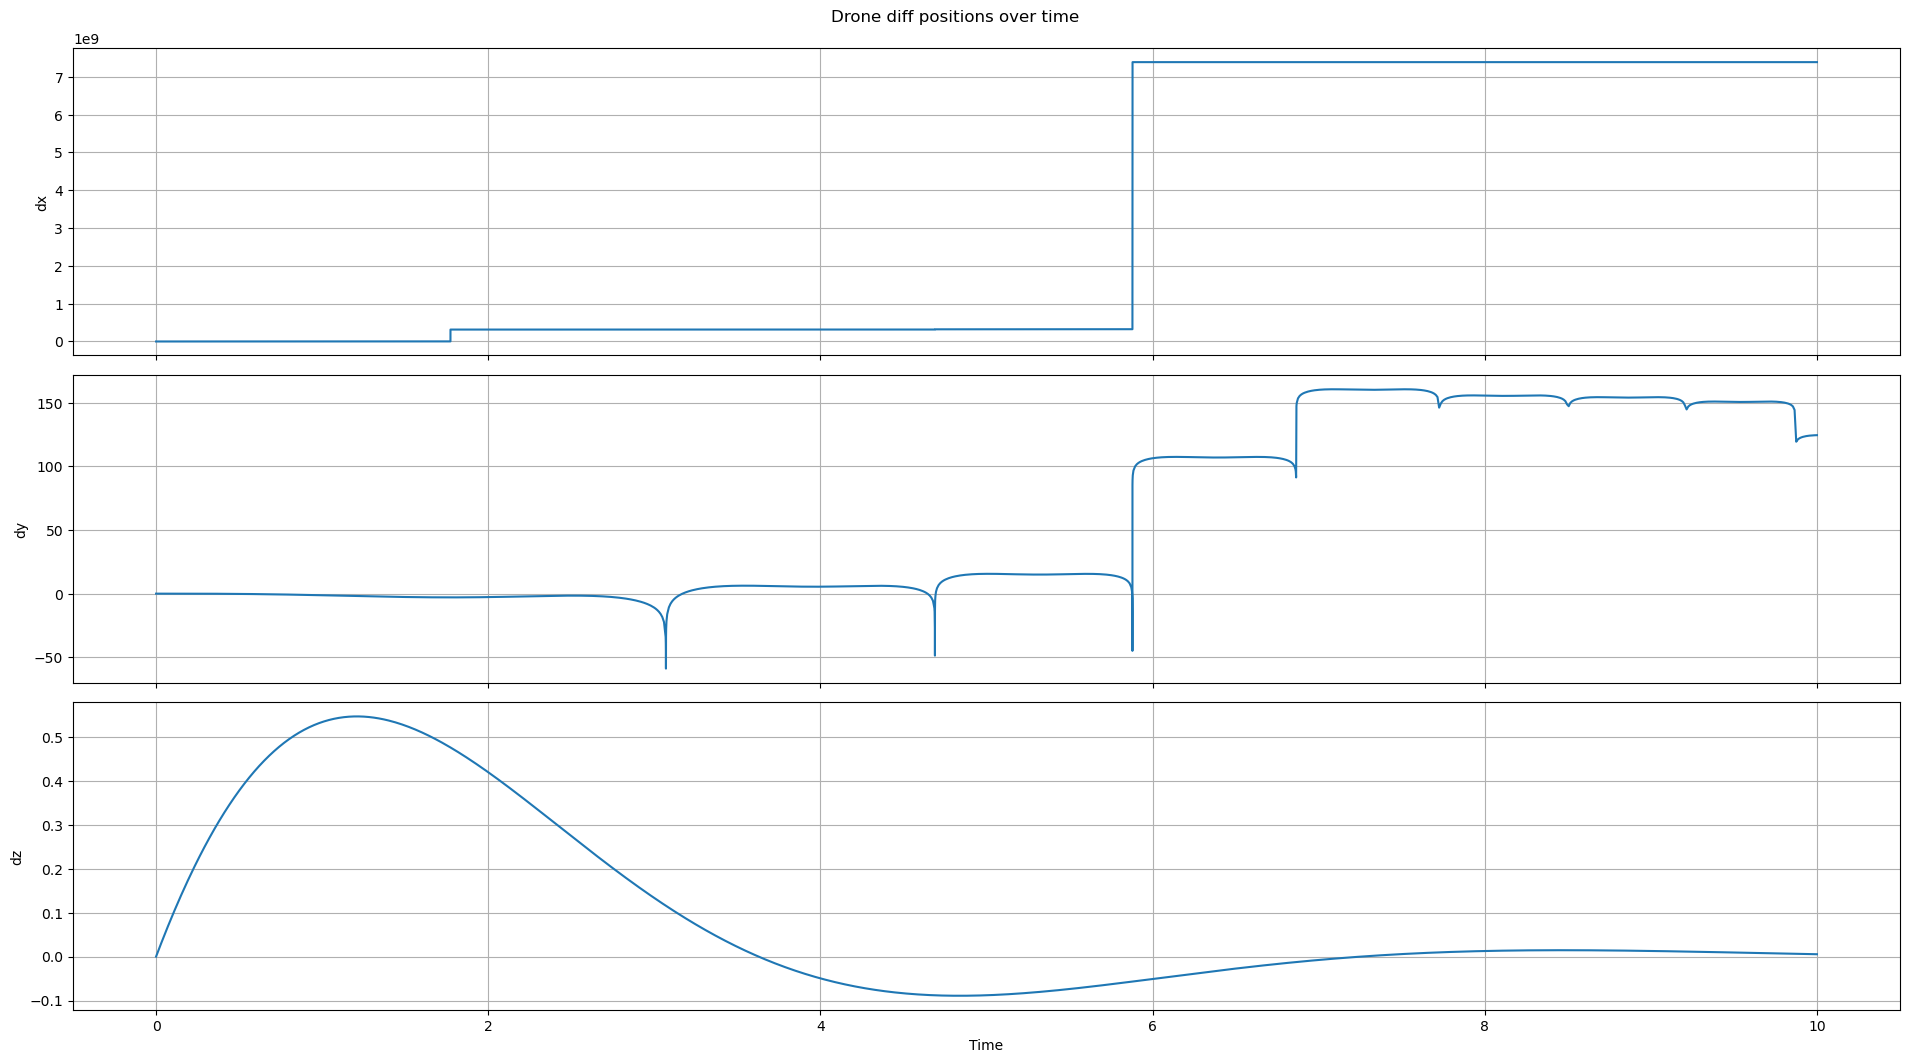

In [5]:
time_plot(['dx', 'dy', 'dz'], sim_out, title='Drone diff positions over time')

## Drone directions over time

(<Figure size 1920x1080 with 3 Axes>,
 array([<AxesSubplot:ylabel='phi'>, <AxesSubplot:ylabel='theta'>,
        <AxesSubplot:xlabel='Time', ylabel='psi'>], dtype=object))

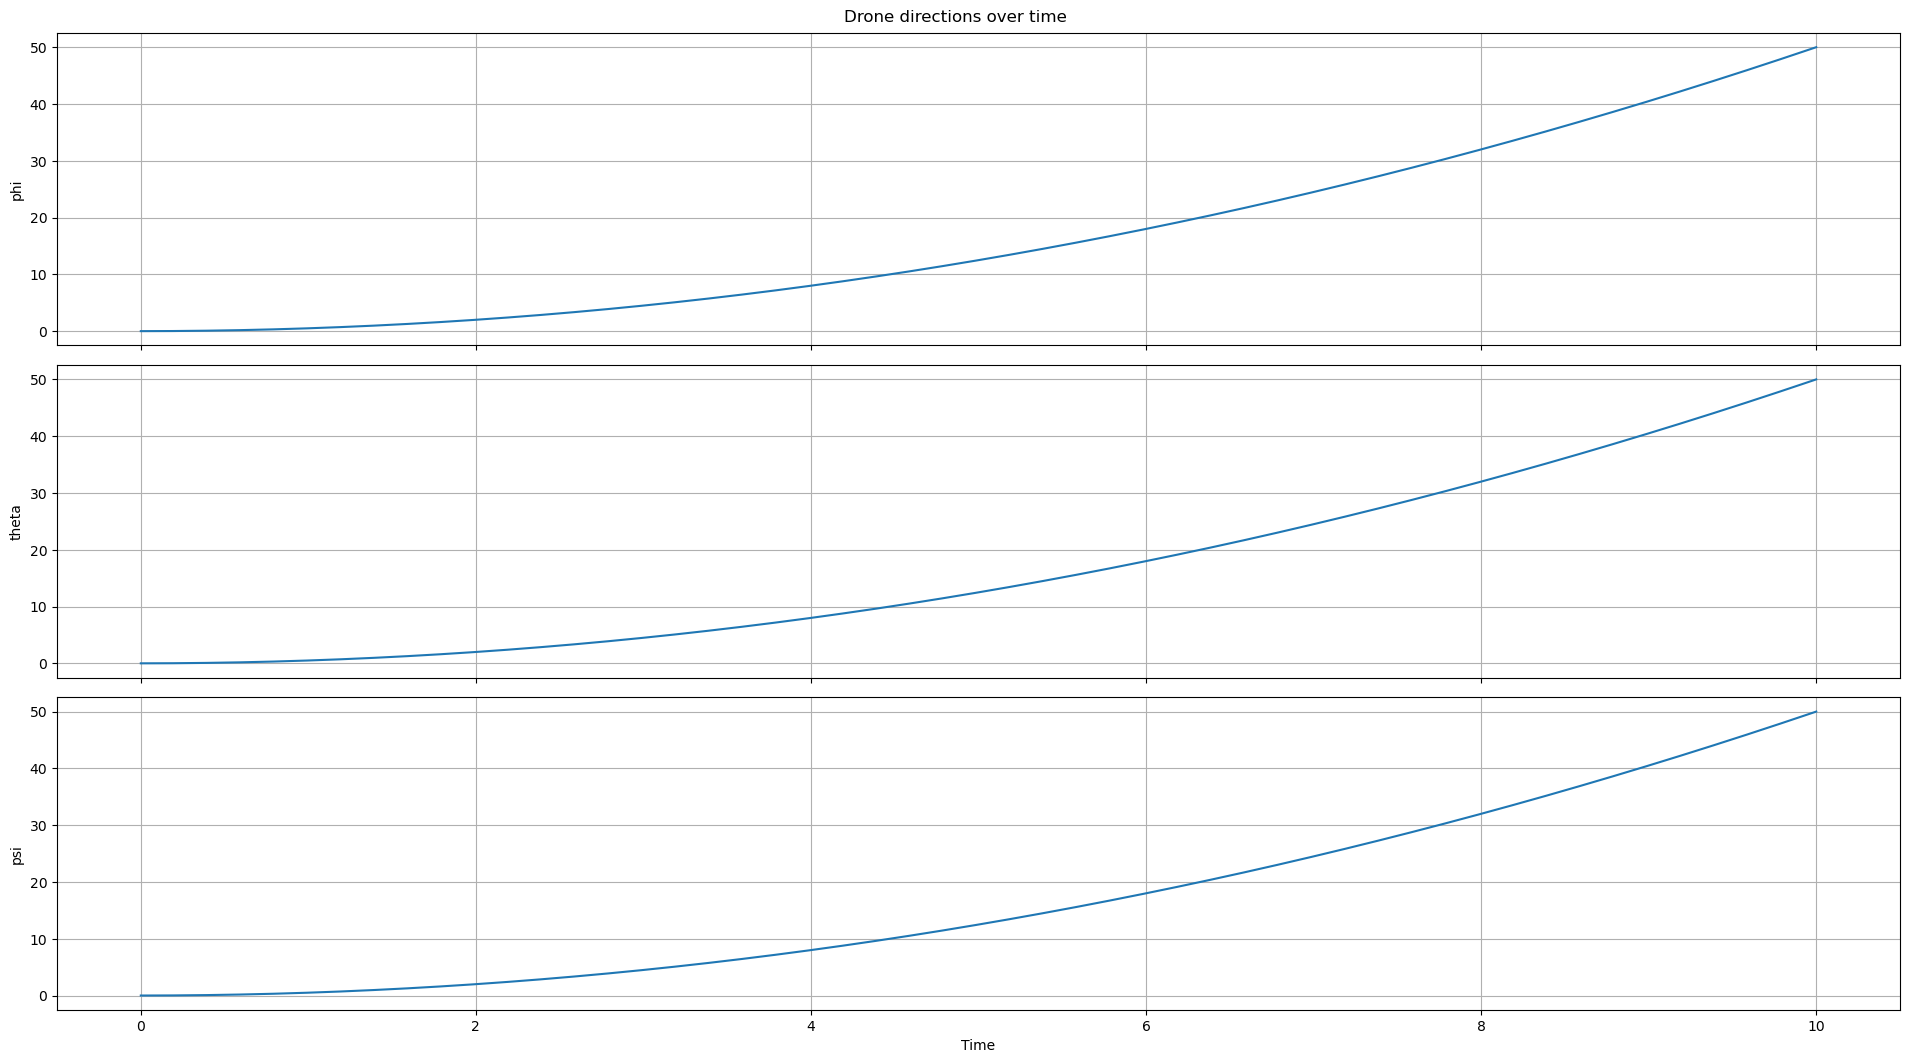

In [6]:
time_plot(['phi', 'theta', 'psi'], sim_out, title='Drone directions over time')

## Drone diff directions over time

(<Figure size 1920x1080 with 3 Axes>,
 array([<AxesSubplot:ylabel='dphi'>, <AxesSubplot:ylabel='dtheta'>,
        <AxesSubplot:xlabel='Time', ylabel='dpsi'>], dtype=object))

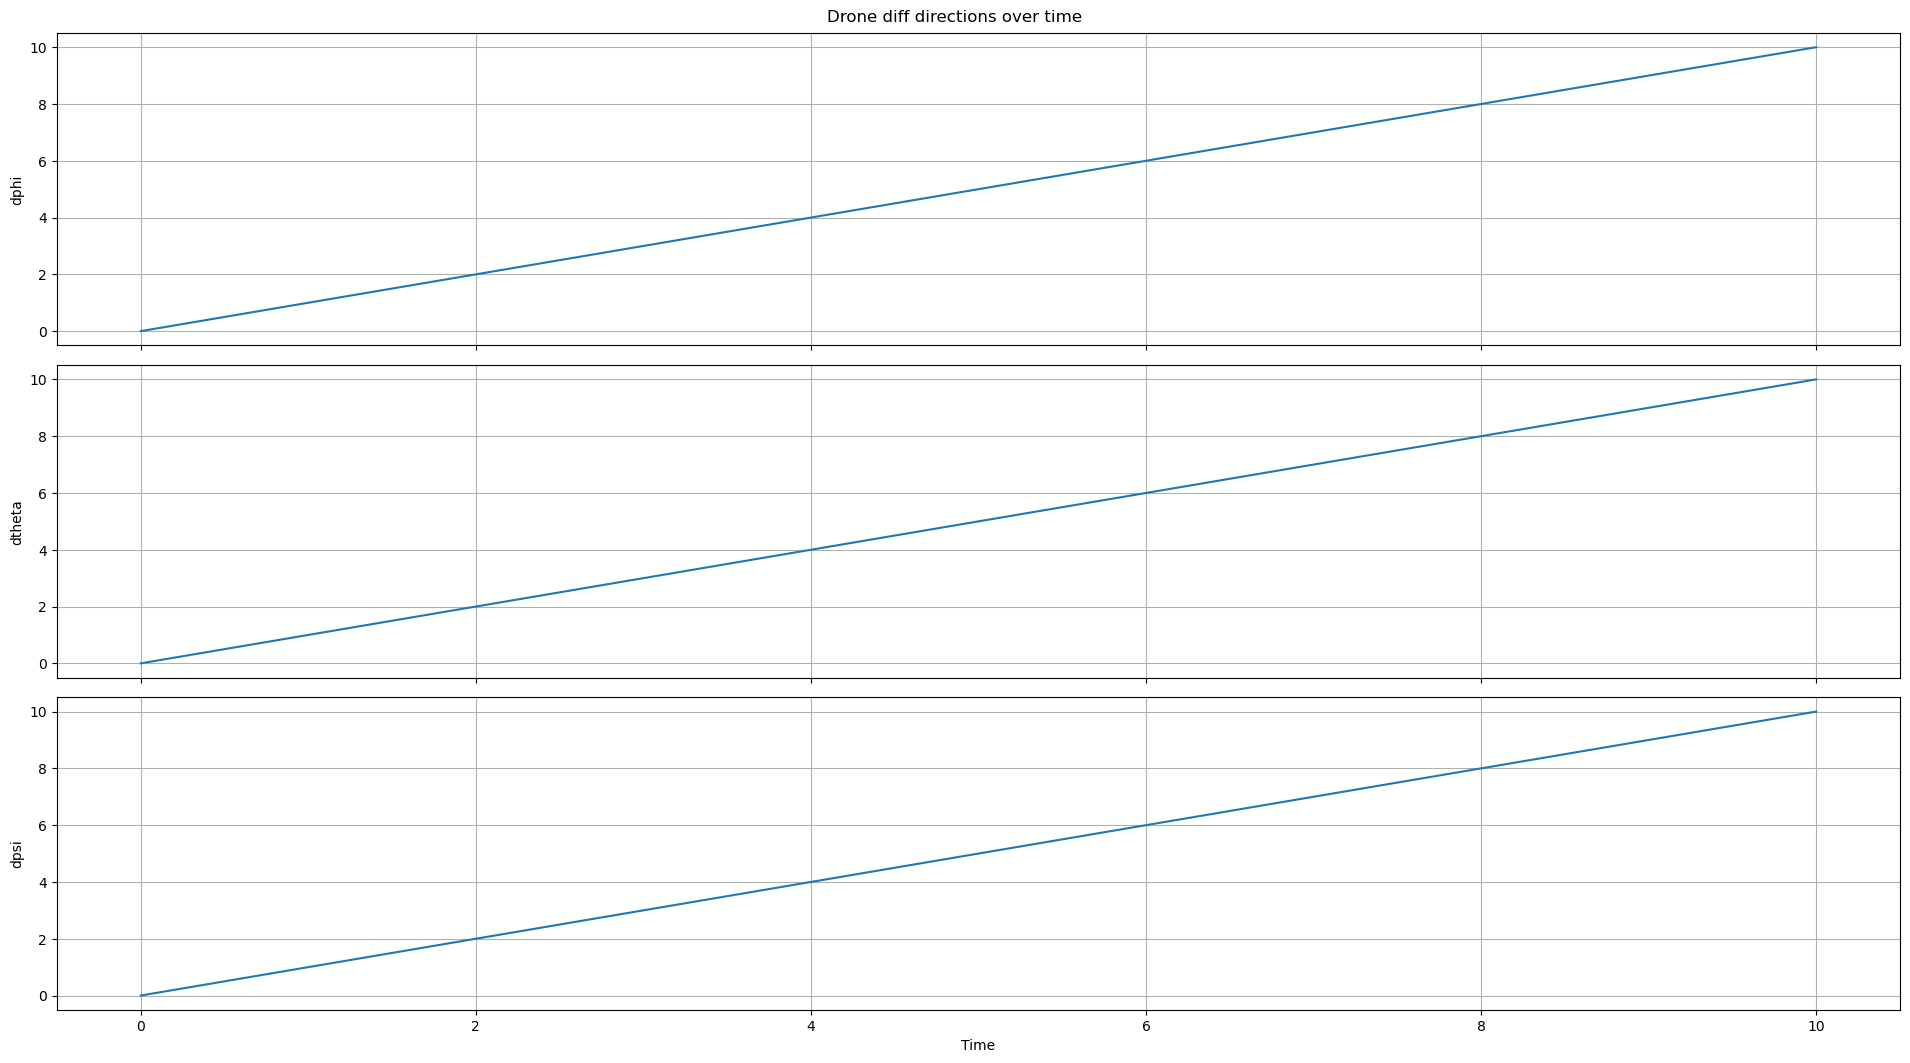

In [7]:
time_plot(['dphi', 'dtheta', 'dpsi'], sim_out, title='Drone diff directions over time')

## State space plots

(<Figure size 1920x1080 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

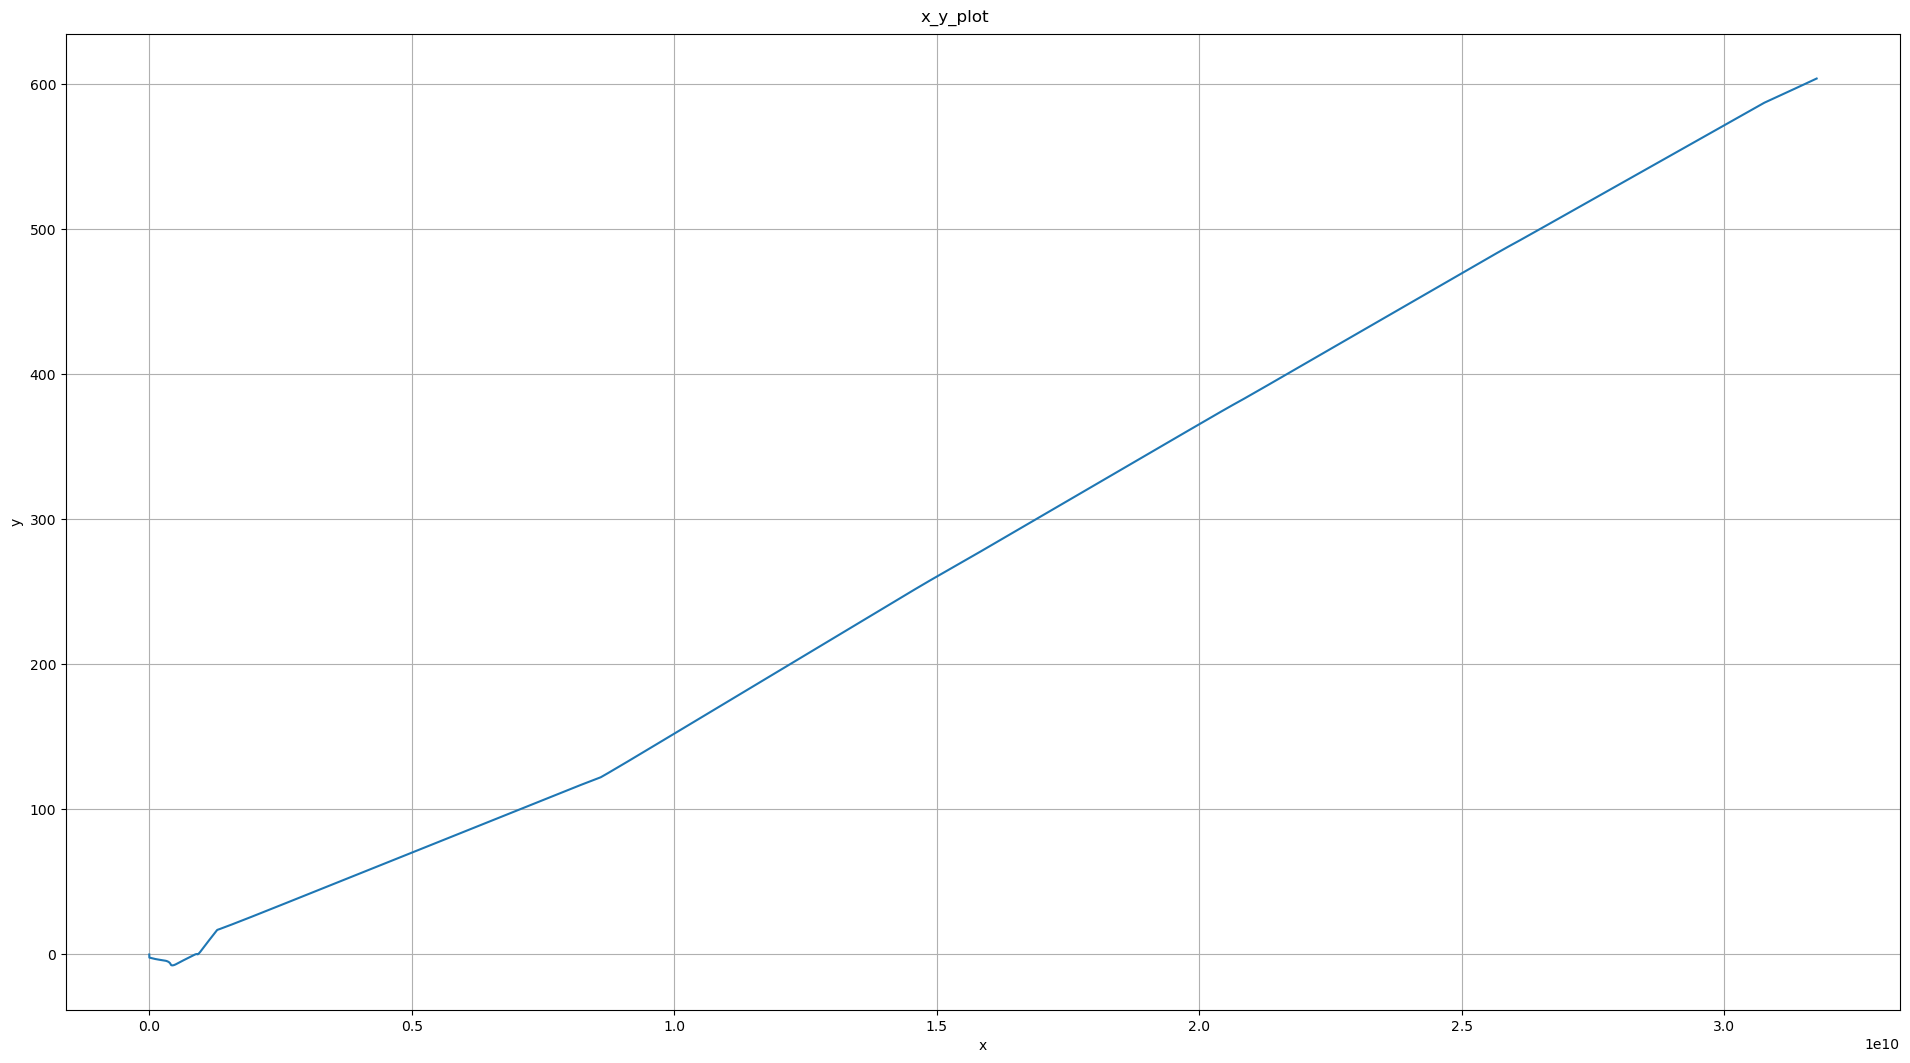

In [8]:
x='x'
y='y'
state_space_plot(x,y,sim_out, title=f'{x}_{y}_plot')